Q. 10 

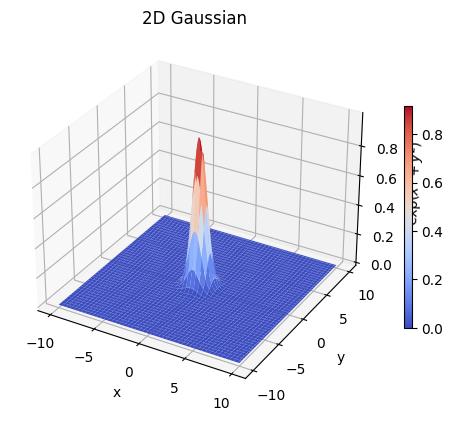

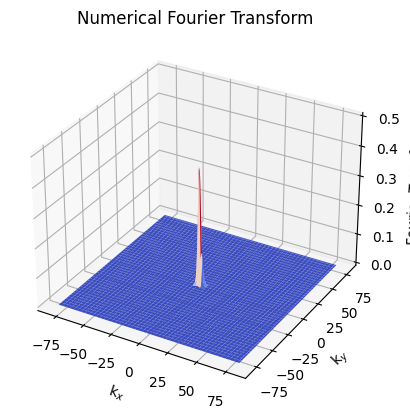

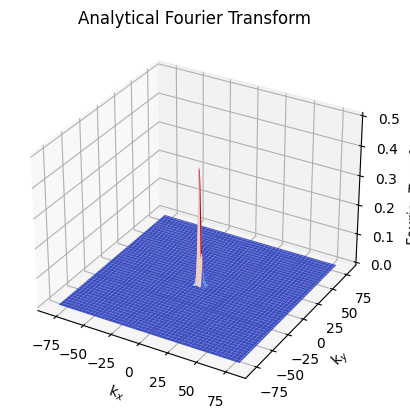

In [1]:
import numpy as np
import numpy.fft as ft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define Gaussian function
def Gaussian(x, y):
    return np.exp(-(x**2 + y**2))

# Define analytical Fourier transform of Gaussian function
def FT_Gaussian(kx, ky):
    return 0.5 * np.exp(-(kx**2 + ky**2) * 0.25)

# Parameters
x_min, x_max = -10.0, 10.0
y_min, y_max = -10.0, 10.0
nx, ny = 512, 512

# Grid spacing
dx = (x_max - x_min) / (nx - 1)
dy = (y_max - y_min) / (ny - 1)

# Generate grid
X, Y = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

# Compute Gaussian function and its Fourier transform
f = Gaussian(X, Y)
kx = 2.0 * np.pi * ft.fftshift(ft.fftfreq(nx, d=dx))
ky = 2.0 * np.pi * ft.fftshift(ft.fftfreq(ny, d=dy))
K_x, K_y = np.meshgrid(kx, ky)
dft_f = ft.fftshift(ft.fft2(f, norm='ortho'))
ft_f = (np.sqrt(nx * ny) / (2 * np.pi)) * dx * dy * np.exp(-1.0j * x_min * K_x) * np.exp(-1.0j * y_min * K_y) * dft_f

# Plot 2D Gaussian
fig1 = plt.figure()
plt_3d_f = fig1.add_subplot(111, projection='3d')
plt_3d_f.set_title("2D Gaussian", fontsize=12)
surf = plt_3d_f.plot_surface(X, Y, f, cmap='coolwarm')
fig1.colorbar(surf, shrink=0.6, aspect=30)
plt_3d_f.set_xlabel("x")
plt_3d_f.set_ylabel("y")
plt_3d_f.set_zlabel("exp($x^2 + y^2$)")

# Plot numerical Fourier Transform
fig2 = plt.figure()
plt_3d_ft = fig2.add_subplot(111, projection='3d')
plt_3d_ft.set_title("Numerical Fourier Transform", fontsize=12)
plt_3d_ft.plot_surface(K_x, K_y, ft_f.real, cmap='coolwarm')
plt_3d_ft.set_xlabel("k$_x$", size=10)
plt_3d_ft.set_ylabel("k$_y$", size=10)
plt_3d_ft.set_zlabel("Fourier Transform")

# Plot analytical Fourier Transform
fig3 = plt.figure()
plt_3d_ft2 = fig3.add_subplot(111, projection='3d')
plt_3d_ft2.set_title("Analytical Fourier Transform", fontsize=12)
plt_3d_ft2.plot_surface(K_x, K_y, FT_Gaussian(K_x, K_y), cmap='coolwarm')
plt_3d_ft2.set_xlabel("k$_x$", size=10)
plt_3d_ft2.set_ylabel("k$_y$", size=10)
plt_3d_ft2.set_zlabel("Fourier Transform")

plt.show()
